# Mounting Gdrive

In [1]:
from google.colab import drive

drive.mount('/content/drive/', force_remount=True)


Mounted at /content/drive/


In [2]:
!ls "/content/drive/Shareddrives/IST 691 Project/app/dataset"

Plant_leave_diseases_dataset_with_augmentation	test  train  validation


In [3]:
!ls /content/drive/


MyDrive  Shareddrives


# Installing Keras

In [4]:
!pip install -q keras

In [ ]:
# import zipfile

# zip_path = '/content/drive/Shareddrives/IST 691 Project/app/Plant_leaf_diseases_dataset_with_augmentation.zip'

# unzip_path = '/content/drive/Shareddrives/IST 691 Project/app/new_dataset/'

# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(unzip_path)

In [ ]:
#DATASET_PATH = '/content/drive/My Drive/app/Plant_leaf_diseases_dataset_with_augmentation.zip'
#zip_object = zipfile.ZipFile(file = DATASET_PATH,mode = 'r')
#zip_object.extractall('./')
#zip_object.close


In [5]:
!ls '/content/drive/Shareddrives/IST 691 Project/app/new_dataset/'

Plant_leave_diseases_dataset_with_augmentation	test  train  validation


In [6]:
DATASET = '/content/dataset/Plant_leave_diseases_dataset_with_augmentation/'
IMAGE_HEIGHT = 256
IMAGE_WIDTH = 256

In [ ]:
#def create_dataset(DATASET_PATH):
#    img_data_array = []
#    class_name = []

#    for directory in os.listdir(DATASET_PATH):
#        for file in os.listdir(os.path.join(DATASET_PATH, directory)):
#            image_path = os.path.join(DATASET_PATH, directory, file)
#            image = cv.imread(image_path, cv.COLOR_BGR2RGB)
#            image = cv.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH), interpolation = cv.INTER_AREA)
#            image = np.array(image)
#            image = image.astype('float32')
#            image /= 255
#            img_data_array.append(image)
#            class_name.append(directory)

#    return img_data_array, class_name

In [7]:
# Import the necessary libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Define the path to the dataset folder
dataset_path = "/content/drive/Shareddrives/IST 691 Project/app/new_dataset/Plant_leave_diseases_dataset_with_augmentation/"

# Create an empty list to store the image paths and labels
image_paths = []
labels = []

# Loop through the subfolders and append the image paths and labels to the list
for folder in os.listdir(dataset_path):
  folder_path = os.path.join(dataset_path, folder)
  for image in os.listdir(folder_path):
    image_path = os.path.join(folder_path, image)
    image_paths.append(image_path)
    labels.append(folder)

# Create a dataframe from the list
df = pd.DataFrame({"image_path": image_paths, "label": labels})

# Display the first five rows of the dataframe
df.describe()

,image_path,label
count,19744,19744
unique,19744,17
top,/content/drive/Shareddrives/IST 691 Project/ap...,Apple___healthy
freq,1,1645


In [ ]:
df.head()

,image_path,label
0,/content/drive/Shareddrives/IST 691 Project/ap...,Apple___Apple_scab
1,/content/drive/Shareddrives/IST 691 Project/ap...,Apple___Apple_scab
2,/content/drive/Shareddrives/IST 691 Project/ap...,Apple___Apple_scab
3,/content/drive/Shareddrives/IST 691 Project/ap...,Apple___Apple_scab
4,/content/drive/Shareddrives/IST 691 Project/ap...,Apple___Apple_scab


In [ ]:
df['Plant Family'] = df['label'].apply(lambda x: x.split('___')[0])
df['Disease'] = df['label'].apply(lambda x: x.split('___')[1] if '___' in x else '')

In [ ]:

# # Define a function to read and resize an image
# def read_resize_image(image_path, size=(224, 224)):
#   # Read the image as a numpy array
#   #image = plt.imread(image_path)
#   # Resize the image to the given size
#   #image = resize(image, size)
#   # Return the image
#   return image

# # Apply the function to the image_path column and create a new column for the images
# df["image"] = df["image_path"].apply(read_resize_image)

# # Display the first five rows of the dataframe
# df.head()


# # Define a function to calculate the mean pixel value of an image
# def mean_pixel_value(image):
#   # Convert the image to grayscale
#   image = image.mean(axis=2)
#   # Calculate the mean pixel value
#   mean = image.mean()
#   # Return the mean pixel value
#   return mean

# # Apply the function to the image column and create a new column for the mean pixel values
# df["mean_pixel_value"] = df["image"].apply(mean_pixel_value)

# # Display the first five rows of the dataframe
# df.head()

# # Define a function to calculate the standard deviation of pixel values of an image
# def std_pixel_value(image):
#   # Convert the image to grayscale
#   image = image.mean(axis=2)
#   # Calculate the standard deviation of pixel values
#   std = image.std()
#   # Return the standard deviation of pixel values
#   return std

# # Apply the function to the image column and create a new column for the standard deviation of pixel values
# df["std_pixel_value"] = df["image"].apply(std_pixel_value)

# # Display the first five rows of the dataframe
# df.head()

# # Plot a histogram of the mean pixel values by label
# sns.histplot(data=df, x="mean_pixel_value", hue="label", multiple="stack")
# plt.xlabel("Mean Pixel Value")
# plt.ylabel("Count")
# plt.title("Histogram of Mean Pixel Values by Label")
# plt.show()

# # Plot a histogram of the standard deviation of pixel values by label
# sns.histplot(data=df, x="std_pixel_value", hue="label", multiple="stack")
# plt.xlabel("Standard Deviation of Pixel Values")
# plt.ylabel("Count")
# plt.title("Histogram of Standard Deviation of Pixel Values by Label")
# plt.show()

# # Plot a boxplot of the mean pixel values by label
# sns.boxplot(data=df, x="label", y="mean_pixel_value")
# plt.xlabel("Label")
# plt.ylabel("Mean Pixel Value")
# plt.title("Boxplot of Mean Pixel Values by Label")
# plt.show()

# # Plot a boxplot of the standard deviation of pixel values by label
# sns.boxplot(data=df, x="label", y="std_pixel_value")
# plt.xlabel("Label")
# plt.ylabel("Standard Deviation of Pixel Values")
# plt.title("Boxplot of Standard Deviation of Pixel Values by Label")
# plt.show()


Class Name                          Image Count
---------------------------------------------
Apple___Apple_scab                  1000
Apple___Black_rot                   1000
Apple___Cedar_apple_rust            1000
Apple___healthy                     1645
Background_without_leaves           1143
Blueberry___healthy                 1502
Cherry___healthy                    1000
Cherry___Powdery_mildew             1052
Corn___Cercospora_leaf_spot Gray_leaf_spot 1000
Corn___Common_rust                  1192
Corn___healthy                      1162
Corn___Northern_Leaf_Blight         1000
Grape___Black_rot                   1180
Grape___Esca_(Black_Measles)        1383
Grape___healthy                     1000
Grape___Leaf_blight_(Isariopsis_Leaf_Spot) 1076
Orange___Haunglongbing_(Citrus_greening) 5507
Peach___Bacterial_spot              2297
Peach___healthy                     1000
Pepper,_bell___Bacterial_spot       1000
Pepper,_bell___healthy              1478
Potato___Early_blight     

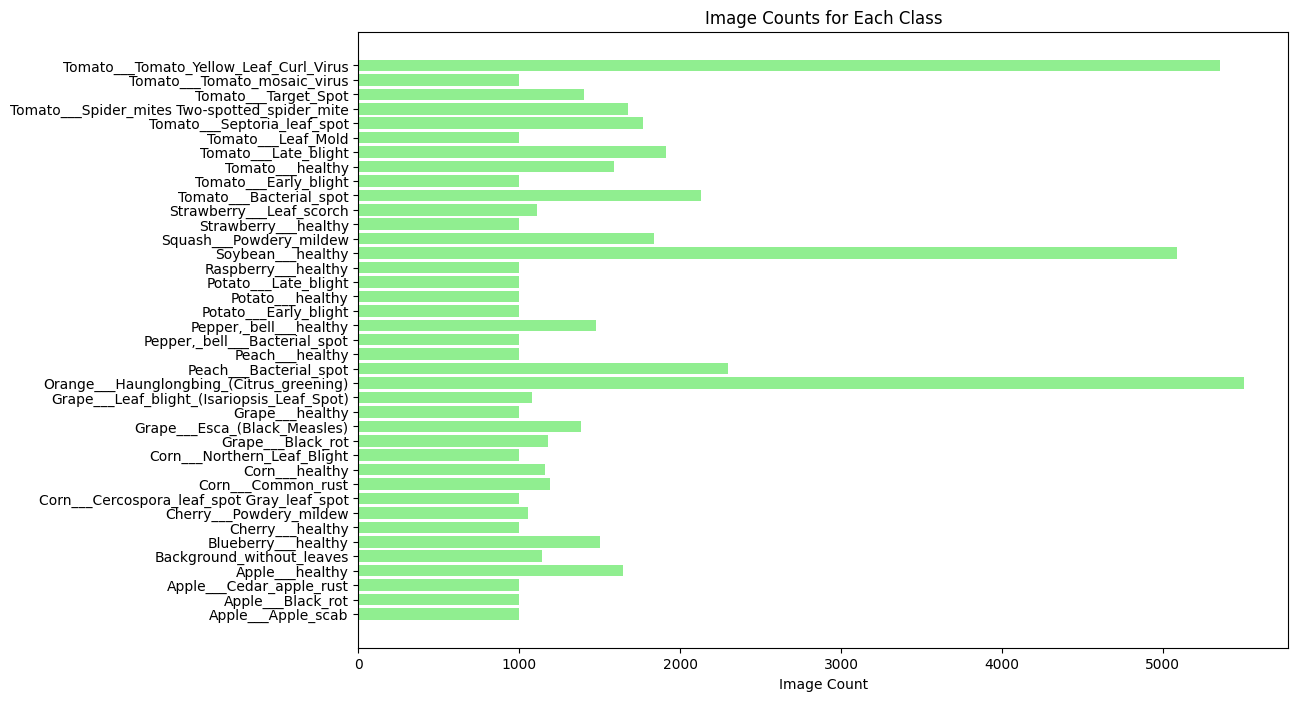

In [ ]:
import os
import matplotlib.pyplot as plt

dataset_directory = '/content/drive/Shareddrives/IST 691 Project/app/new_dataset/Plant_leave_diseases_dataset_with_augmentation/'
class_image_count = {}
for subfolder in os.listdir(dataset_directory):
    subfolder_path = os.path.join(dataset_directory, subfolder)
    if os.path.isdir(subfolder_path):
        image_count = len([name for name in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, name))])
        class_image_count[subfolder] = image_count
print(f"{'Class Name':<35} Image Count")
print("-" * 45)
for class_name, count in class_image_count.items():
    print(f"{class_name:<35} {count}")

class_names = list(class_image_count.keys())
image_counts = list(class_image_count.values())

plt.figure(figsize=(12, 8))
plt.barh(class_names, image_counts, color='lightgreen')
plt.xlabel('Image Count')
plt.title('Image Counts for Each Class')
plt.show()

In [ ]:
total = 0
totalhealthy = 0
for foldername, image_count in class_image_count.items():
  if foldername.endswith('healthy'):
    totalhealthy += image_count
  total += image_count
print(totalhealthy/total)

0.300361057801776


                 Plant Family  Count
0                       Apple   4645
1   Background_without_leaves   1143
2                   Blueberry   1502
3                      Cherry   2052
4                        Corn   4354
5                       Grape   4639
6                      Orange   5507
7                       Peach   3297
8                Pepper,_bell   2478
9                      Potato   3000
10                  Raspberry   1000
11                    Soybean   5090
12                     Squash   1835
13                 Strawberry   2109
14                     Tomato  18835


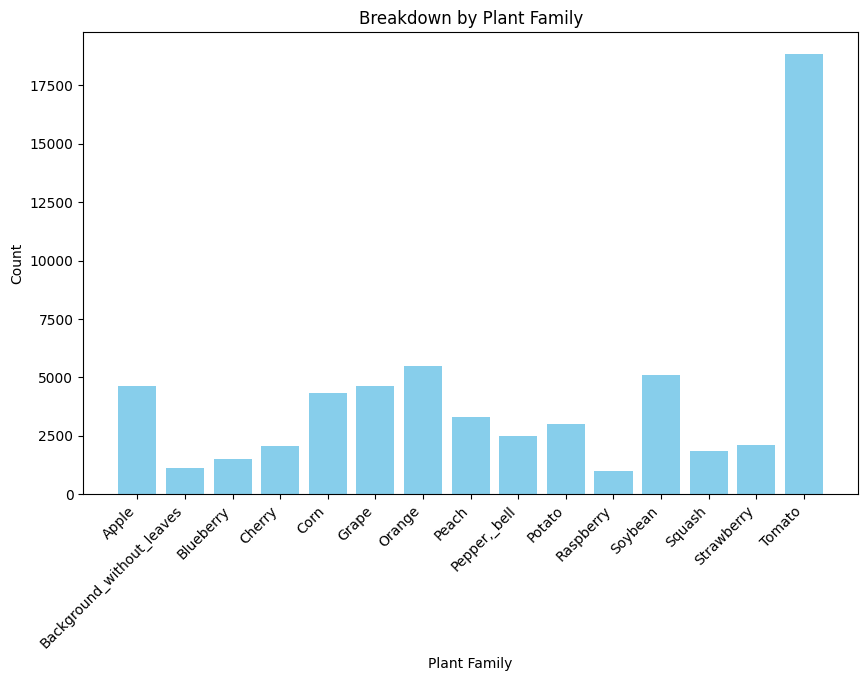

In [ ]:
grouped_df = df.groupby('Plant Family').size().reset_index(name='Count')

# Display the grouped DataFrame
print(grouped_df)

# Visualize the results with a bar chart
plt.figure(figsize=(10, 6))
plt.xticks(rotation=45, ha='right')
plt.bar(grouped_df['Plant Family'], grouped_df['Count'], color='skyblue')
plt.xlabel('Plant Family')
plt.ylabel('Count')
plt.title('Breakdown by Plant Family')
plt.show()

In [ ]:
import os
import shutil
import numpy as np

# Base directory where train, test, validation folders should be created
base_dir = '/content/drive/Shareddrives/IST 691 Project/app/dataset/'

# Original dataset directory
original_dataset_dir = '/content/drive/Shareddrives/IST 691 Project/app/dataset/Plant_leave_diseases_dataset_with_augmentation/'

train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

# Create directories for the train, validation, and test sets in the base directory
for set_name in ['train', 'validation', 'test']:
    os.makedirs(os.path.join(base_dir, set_name), exist_ok=True)

def split_data(class_name):
    class_dir = os.path.join(original_dataset_dir, class_name)

    files = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]
    np.random.shuffle(files)

    train_split = int(len(files) * train_ratio)
    validation_split = int(len(files) * (train_ratio + validation_ratio))

    for i, file in enumerate(files):
        if i < train_split:
            set_name = 'train'
        elif i < validation_split:
            set_name = 'validation'
        else:
            set_name = 'test'

        src = os.path.join(class_dir, file)
        dst = os.path.join(base_dir, set_name, class_name, file)
        shutil.copyfile(src, dst)

# Split data for each class
classes = os.listdir(original_dataset_dir)
for class_name in classes:
    os.makedirs(os.path.join(base_dir, 'train', class_name), exist_ok=True)
    os.makedirs(os.path.join(base_dir, 'validation', class_name), exist_ok=True)
    os.makedirs(os.path.join(base_dir, 'test', class_name), exist_ok=True)
    split_data(class_name)

In [ ]:
!ls '/content/drive/Shareddrives/IST 691 Project/app/dataset/validation'
# !rm -r '/content/drive/Shareddrives/IST 691 Project/app/dataset/Plant_leave_diseases_dataset_with_augmentation/test'
# !rm -r '/content/drive/Shareddrives/IST 691 Project/app/dataset/Plant_leave_diseases_dataset_with_augmentation/train'
# !rm -r '/content/drive/Shareddrives/IST 691 Project/app/dataset/Plant_leave_diseases_dataset_with_augmentation/validation'

# !mv '/content/drive/Shareddrives/IST 691 Project/app/dataset/Plant_leave_diseases_dataset_with_augmentation/train' '/content/drive/Shareddrives/IST 691 Project/app/dataset/'
# !mv '/content/drive/Shareddrives/IST 691 Project/app/dataset/Plant_leave_diseases_dataset_with_augmentation/test' '/content/drive/Shareddrives/IST 691 Project/app/dataset/'
# !mv '/content/drive/Shareddrives/IST 691 Project/app/dataset/Plant_leave_diseases_dataset_with_augmentation/validation' '/content/drive/Shareddrives/IST 691 Project/app/dataset/'


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

BATCH_SIZE = 256
IMAGE_WIDTH = 256
IMAGE_HEIGHT = 256
EPOCHS = 10
NUM_CLASSES = 39
CHANNELS = 3

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, CHANNELS)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Additional layers can be added here

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load and preprocess the data
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

BATCH_SIZE = 32
IMAGE_WIDTH = 256
IMAGE_HEIGHT = 256
EPOCHS = 5
NUM_CLASSES = 39

train_generator = train_datagen.flow_from_directory(
    '/content/drive/Shareddrives/IST 691 Project/app/dataset/train',
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/Shareddrives/IST 691 Project/app/dataset/validation',
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    '/content/drive/Shareddrives/IST 691 Project/app/dataset/test',
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test accuracy: ", test_accuracy)

In [ ]:
## ResNet50

from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

# Load the ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Can add a few more layers on top of the ResNet50 base
model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(NUM_CLASSES, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test accuracy: ", test_accuracy)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Define constants
img_width, img_height = 256, 256
num_classes = 39
batch_size = 32

# Define paths to your train, validation, and test data directories
train_dir = '/content/drive/Shareddrives/IST 691 Project/app/dataset/train'
validation_dir = '/content/drive/Shareddrives/IST 691 Project/app/dataset/validation'
test_dir = '/content/drive/Shareddrives/IST 691 Project/app/dataset/test'

# Create ImageDataGenerators without data augmentation
train_datagen = ImageDataGenerator(rescale=1. / 255)
validation_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load pre-trained VGG16 and ResNet50 models
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Create and compile a custom CNN model
custom_model = Sequential()
custom_model.add(vgg_model)  # Use VGG16 as base

custom_model.add(Flatten())
custom_model.add(Dense(512, activation='relu'))
custom_model.add(Dropout(0.5))
custom_model.add(Dense(num_classes, activation='softmax'))

custom_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the custom model
history = custom_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Evaluate the model on test data
test_loss, test_accuracy = custom_model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy}")

In [ ]:
## DO NOT RUN AGAIN

## The old Dataset had corrupted files, so I have created a new folder new_datasets



# import os
# import shutil
# import numpy as np

# # Base directory where train, test, validation folders should be created
# base_dir = '/content/drive/Shareddrives/IST 691 Project/app/new_dataset/'

# # Original dataset directory
# original_dataset_dir = '/content/drive/Shareddrives/IST 691 Project/app/new_dataset/Plant_leave_diseases_dataset_with_augmentation/'

# train_ratio = 0.70
# validation_ratio = 0.15
# test_ratio = 0.15

# # Create directories for the train, validation, and test sets in the base directory
# for set_name in ['train', 'validation', 'test']:
#     os.makedirs(os.path.join(base_dir, set_name), exist_ok=True)

# def split_data(class_name):
#     class_dir = os.path.join(original_dataset_dir, class_name)

#     files = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]
#     np.random.shuffle(files)

#     train_split = int(len(files) * train_ratio)
#     validation_split = int(len(files) * (train_ratio + validation_ratio))

#     for i, file in enumerate(files):
#         if i < train_split:
#             set_name = 'train'
#         elif i < validation_split:
#             set_name = 'validation'
#         else:
#             set_name = 'test'

#         src = os.path.join(class_dir, file)
#         dst = os.path.join(base_dir, set_name, class_name, file)
#         shutil.copyfile(src, dst)

# # Split data for each class
# classes = os.listdir(original_dataset_dir)
# for class_name in classes:
#     os.makedirs(os.path.join(base_dir, 'train', class_name), exist_ok=True)
#     os.makedirs(os.path.join(base_dir, 'validation', class_name), exist_ok=True)
#     os.makedirs(os.path.join(base_dir, 'test', class_name), exist_ok=True)
#     split_data(class_name)

In [ ]:
##
## Using the CNN created earlier for 5 epochs to train the model. The data is from new_dataset
##

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load and preprocess the data
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

BATCH_SIZE = 32
IMAGE_WIDTH = 256
IMAGE_HEIGHT = 256
EPOCHS = 5
NUM_CLASSES = 39

train_generator = train_datagen.flow_from_directory(
    '/content/drive/Shareddrives/IST 691 Project/app/new_dataset/train',
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/Shareddrives/IST 691 Project/app/new_dataset/validation',
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    '/content/drive/Shareddrives/IST 691 Project/app/new_dataset/test',
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test accuracy: ", test_accuracy)

Found 43030 images belonging to 39 classes.
Found 9222 images belonging to 39 classes.
Found 9234 images belonging to 39 classes.
Epoch 1/5
1344/1344 [==============================] - 223s 164ms/step - loss: 1.8022 - accuracy: 0.4949 - val_loss: 0.8775 - val_accuracy: 0.7367
Epoch 2/5
1344/1344 [==============================] - 211s 157ms/step - loss: 1.0261 - accuracy: 0.6871 - val_loss: 0.5307 - val_accuracy: 0.8383
Epoch 3/5
1344/1344 [==============================] - 216s 161ms/step - loss: 0.7717 - accuracy: 0.7551 - val_loss: 0.3799 - val_accuracy: 0.8864
Epoch 4/5
1344/1344 [==============================] - 202s 150ms/step - loss: 0.6299 - accuracy: 0.7970 - val_loss: 0.4665 - val_accuracy: 0.8535
Epoch 5/5
289/289 [==============================] - 37s 129ms/step - loss: 0.3604 - accuracy: 0.8822
Test accuracy:  0.882174551486969


In [ ]:
##

## VGG16 DO NOT RUN AGAIN - Stopped due to Google Colab issues

# ##
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.applications import VGG16
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Flatten, Dropout

# # Define constants
# img_width, img_height = 256, 256
# num_classes = 39
# batch_size = 256

# # Define paths to your train, validation, and test data directories
# train_dir = '/content/drive/Shareddrives/IST 691 Project/app/new_dataset/train'
# validation_dir = '/content/drive/Shareddrives/IST 691 Project/app/new_dataset/validation'
# test_dir = '/content/drive/Shareddrives/IST 691 Project/app/new_dataset/test'

# # Create ImageDataGenerators without data augmentation
# train_datagen = ImageDataGenerator()
# validation_datagen = ImageDataGenerator()
# test_datagen = ImageDataGenerator()

# train_generator = train_datagen.flow_from_directory(
#     train_dir,
#     target_size=(img_width, img_height),
#     batch_size=batch_size,
#     class_mode='categorical'
# )

# validation_generator = validation_datagen.flow_from_directory(
#     validation_dir,
#     target_size=(img_width, img_height),
#     batch_size=batch_size,
#     class_mode='categorical'
# )

# test_generator = test_datagen.flow_from_directory(
#     test_dir,
#     target_size=(img_width, img_height),
#     batch_size=batch_size,
#     class_mode='categorical'
# )

# # Load pre-trained VGG16 and ResNet50 models
# vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# # Create and compile a custom CNN model
# custom_model = Sequential()
# custom_model.add(vgg_model)  # Use VGG16 as base

# custom_model.add(Flatten())
# custom_model.add(Dense(512, activation='relu'))
# custom_model.add(Dropout(0.5))
# custom_model.add(Dense(num_classes, activation='softmax'))

# custom_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the custom model
# history = custom_model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // batch_size,
#     epochs=10,
#     validation_data=validation_generator,
#     validation_steps=validation_generator.samples // batch_size
# )

# # Evaluate the model on test data
# test_loss, test_accuracy = custom_model.evaluate(test_generator)
# print(f"Test accuracy: {test_accuracy}")

In [ ]:
##

## Using symlinks instead of copying physical files

##


# import os
# import numpy as np

# # Base directory where train, test, validation folders should be created
# base_dir = '/content/drive/Shareddrives/IST 691 Project/app/new_dataset/'

# # Original dataset directory
# original_dataset_dir = '/content/drive/Shareddrives/IST 691 Project/app/new_dataset/Plant_leave_diseases_dataset_with_augmentation/'

# train_ratio = 0.70
# validation_ratio = 0.15
# test_ratio = 0.15

# # Create directories for the train, validation, and test sets in the base directory
# for set_name in ['train', 'validation', 'test']:
#     os.makedirs(os.path.join(base_dir, set_name), exist_ok=True)

# def create_symlinks(class_name, files, set_name):
#     class_dir = os.path.join(base_dir, set_name, class_name)
#     os.makedirs(class_dir, exist_ok=True)

#     for file in files:
#         src = os.path.join(original_dataset_dir, class_name, file)
#         dst = os.path.join(class_dir, file)
#         os.symlink(src, dst)

# def split_data(class_name):
#     class_dir = os.path.join(original_dataset_dir, class_name)
#     files = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]
#     np.random.shuffle(files)

#     train_split = int(len(files) * train_ratio)
#     validation_split = int(len(files) * (train_ratio + validation_ratio))

#     train_files = files[:train_split]
#     validation_files = files[train_split:validation_split]
#     test_files = files[validation_split:]

#     create_symlinks(class_name, train_files, 'train')
#     create_symlinks(class_name, validation_files, 'validation')
#     create_symlinks(class_name, test_files, 'test')

# # Split data for each class
# classes = os.listdir(original_dataset_dir)
# for class_name in classes:
#     split_data(class_name)


In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# BATCH_SIZE = 256
# IMAGE_WIDTH = 256
# IMAGE_HEIGHT = 256
# EPOCHS = 10
# NUM_CLASSES = 39
# CHANNELS = 3

# # Model architecture
# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, CHANNELS)),
#     MaxPooling2D((2, 2)),

#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),

#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),

#     # Additional layers can be added here

#     Flatten(),
#     Dense(128, activation='relu'),
#     Dropout(0.5),
#     Dense(NUM_CLASSES, activation='softmax')
# ])

# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Data augmentation and generators
# train_datagen = ImageDataGenerator(rescale=1./255)
# validation_datagen = ImageDataGenerator(rescale=1./255)
# test_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_directory(
#     '/content/drive/Shareddrives/IST 691 Project/app/new_dataset/train',
#     target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
#     batch_size=BATCH_SIZE,
#     class_mode='categorical'
# )

# validation_generator = validation_datagen.flow_from_directory(
#     '/content/drive/Shareddrives/IST 691 Project/app/new_dataset/validation',
#     target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
#     batch_size=BATCH_SIZE,
#     class_mode='categorical'
# )

# test_generator = test_datagen.flow_from_directory(
#     '/content/drive/Shareddrives/IST 691 Project/app/new_dataset/test',
#     target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
#     batch_size=BATCH_SIZE,
#     class_mode='categorical'
# )

# # Train the model
# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // BATCH_SIZE,
#     epochs=EPOCHS,
#     validation_data=validation_generator,
#     validation_steps=validation_generator.samples // BATCH_SIZE
# )

# # Evaluate the model
# test_loss, test_accuracy = model.evaluate(test_generator)
# print("Test accuracy: ", test_accuracy)
